In [1]:
import glob
import numpy as np
import tables as tb
import pandas as pd

from invisible_cities.io.dst_io import load_dst
import matplotlib.pyplot as plt

In [2]:
basedir = '/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/data/pressure_topology/'

pressures = ['1bar', '2bar', '5bar', '13bar']

In [3]:
def get_file_dict(basedir, dt, pressures = ['1bar', '2bar', '5bar', '13bar']):
    nexusfiles, labelfiles, graphfiles = {}, {}, {}

    for p in pressures:
        nexusdir = basedir + '{p}/{dt}/nexus/*_{dt}.h5'.format(p = p, dt = dt)
        labeldir = basedir + '{p}/{dt}/label/prod/*_{dt}.h5'.format(p = p, dt = dt)
        graphdir = basedir + '{p}/{dt}/label/prod/*_{dt}_graph.h5'.format(p = p, dt = dt)

        nexusfiles[p] = sorted(glob.glob(nexusdir), key = lambda x: int(x.split('/')[-1].split('_')[-2]))
        labelfiles[p] = sorted(glob.glob(labeldir), key = lambda x: int(x.split('/')[-1].split('_')[-2]))
        graphfiles[p] = sorted(glob.glob(graphdir), key = lambda x: int(x.split('/')[-1].split('_')[-3]))
    return nexusfiles, labelfiles, graphfiles

In [4]:
def get_extr_dist(file_dict, dt, label_hits_path, pressures = ['1bar', '2bar', '5bar', '13bar']):
    label_hits_all = pd.read_hdf(label_hits_path, dt)
    label_hits_all = label_hits_all[(label_hits_all.segclass == 1)]
    results = pd.DataFrame([])
    for p in pressures:
        print(p)
        for f in file_dict[p]:
            fnum = int(f.split('_')[-2])

            label_hits = label_hits_all[(label_hits_all.pressure == p) & (label_hits_all.filenum == fnum)].drop('segclass', axis = 1)
            track_info = pd.read_hdf(f, 'DATASET/IsauraMCInfo')
            event_info = pd.read_hdf(f, 'DATASET/EventsInfo')
            #select because with labelling some events are removed (the ones with z<0)
            track_info = track_info[np.isin(track_info.event, event_info.event_id)]

            dist_ext_df = pd.DataFrame(get_mc_isa_extr_dist(track_info, label_hits)).rename(columns={0:'ext_dist'})

            dist_ext_df.insert(len(dist_ext_df.columns), 'pressure', p)
            dist_ext_df.insert(len(dist_ext_df.columns), 'filenum', fnum)
            results = results.append(dist_ext_df)
    return results

In [5]:
# results = get_mc_blob_energy(labelfiles, '1eroi', save_path, [1, 2, 3, 4])

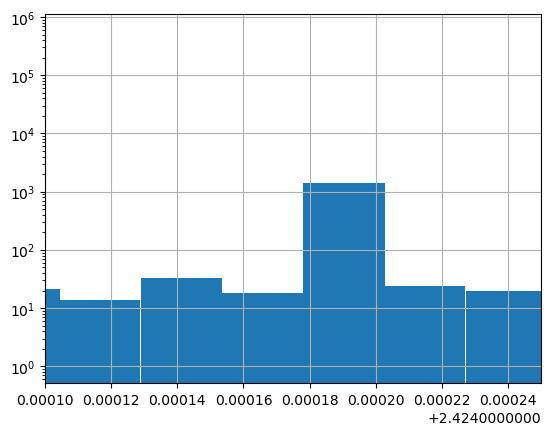

In [112]:
cosa = pd.read_hdf(basedir + 'nexus_info_df.h5', '0nubb')

plt.hist(cosa.tot_ene, 5000)
plt.yscale('log')
plt.xlim((2.42418, 2.42425))
plt.grid()

In [117]:
cosa[(cosa.tot_ene > 2.42418) & (cosa.tot_ene < 2.4242) & (cosa.pressure == '13bar')]

,nhits,tot_ene,pressure,event_id,filenum


In [108]:
nfile = 1
evid = 23

file = '13bar/0nubb/nexus/nexus_{}_0nubb.h5'.format(nfile)
part = load_dst(basedir + file, 'MC', 'particles')
hits = load_dst(basedir + file, 'MC', 'hits')

out_parts = hits[(hits.event_id == evid) & (hits.label != 'ACTIVE')].particle_id.unique()
part[(part.event_id == evid)][(np.isin(part.particle_id, out_parts)) | (part.final_volume != 'ACTIVE')][['particle_id', 'mother_id', 'particle_name', 'final_volume', 'kin_energy', 'creator_proc', 'final_proc']]


/scratch/7716829/ipykernel_3364695/78073850.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  part[(part.event_id == evid)][(np.isin(part.particle_id, out_parts)) | (part.final_volume != 'ACTIVE')][['particle_id', 'mother_id', 'particle_name', 'final_volume', 'kin_energy', 'creator_proc', 'final_proc']]


,particle_id,mother_id,particle_name,final_volume,kin_energy,creator_proc,final_proc
728,44,3,gamma,VESSEL_GAS,0.029781,phot,phot
729,68,44,e-,VESSEL_GAS,0.000046,phot,msc
730,67,44,e-,VESSEL_GAS,0.000021,phot,eIoni
731,66,44,e-,VESSEL_GAS,0.000021,phot,msc
732,65,44,e-,VESSEL_GAS,0.000021,phot,msc
733,64,44,e-,VESSEL_GAS,0.000012,phot,eIoni
734,63,44,e-,VESSEL_GAS,0.000012,phot,msc
735,62,44,e-,VESSEL_GAS,0.000047,phot,msc
736,61,44,e-,VESSEL_GAS,0.000048,phot,msc
737,60,44,e-,VESSEL_GAS,0.000382,phot,eIoni


In [107]:
nfile = 8
evid = 4076

file = '13bar/0nubb/nexus/nexus_{}_0nubb.h5'.format(nfile)
part = load_dst(basedir + file, 'MC', 'particles')
hits = load_dst(basedir + file, 'MC', 'hits')

out_parts = hits[(hits.event_id == evid) & (hits.label != 'ACTIVE')].particle_id.unique()
part[(part.event_id == evid)][(np.isin(part.particle_id, out_parts)) | (part.final_volume != 'ACTIVE')][['particle_id', 'mother_id', 'particle_name', 'initial_volume', 'final_volume', 'kin_energy', 'creator_proc', 'final_proc']]



/scratch/7716829/ipykernel_3364695/2482978975.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  part[(part.event_id == evid)][(np.isin(part.particle_id, out_parts)) | (part.final_volume != 'ACTIVE')][['particle_id', 'mother_id', 'particle_name', 'initial_volume', 'final_volume', 'kin_energy', 'creator_proc', 'final_proc']]


,particle_id,mother_id,particle_name,initial_volume,final_volume,kin_energy,creator_proc,final_proc
4624,20,6,gamma,ACTIVE,EL_GAP,0.029781,phot,phot
4625,37,20,e-,EL_GAP,EL_GAP,0.000046,phot,msc
4626,36,20,e-,EL_GAP,EL_GAP,0.000034,phot,msc
4627,35,20,e-,EL_GAP,EL_GAP,0.000021,phot,eIoni
4628,34,20,e-,EL_GAP,EL_GAP,0.000023,phot,eIoni
4629,33,20,e-,EL_GAP,EL_GAP,0.000540,phot,eIoni
4630,32,20,e-,EL_GAP,EL_GAP,0.000553,phot,eIoni
4631,31,20,e-,EL_GAP,EL_GAP,0.003735,phot,eIoni
4632,30,20,e-,EL_GAP,EL_GAP,0.024677,phot,eIoni


The 2.4280 MeV peak seems to come from a photoelectric photon of 0.029781 MeV that escapes the active.

In [93]:
part.columns

Index(['event_id', 'particle_id', 'particle_name', 'primary', 'mother_id',
       'initial_x', 'initial_y', 'initial_z', 'initial_t', 'final_x',
       'final_y', 'final_z', 'final_t', 'initial_volume', 'final_volume',
       'initial_momentum_x', 'initial_momentum_y', 'initial_momentum_z',
       'final_momentum_x', 'final_momentum_y', 'final_momentum_z',
       'kin_energy', 'length', 'creator_proc', 'final_proc'],
      dtype='object')